# Salma Y. Roriguez

### 06/08/2022

# Exploratory Analysis

## Updates

* As of the close of business day, on 04 February 2022, the US Treasury Department implemented changes to the URLs for the XML data feeds, XML schemas (the XSD files) and the XML files themselves. My analysis is updated below to reflect these changes.

## Categories of Bonds

| $\text{Type}$     | $\text{Maturity}$                        |
| ----------------- | ---------------------------------------- |
| $\text{Bill (b)}$ | $1\text{m} \leq \text{T} \lt 1\text{Y}$ |
| $\text{Note (N)}$ | $1\text{Y} \leq \text{T} \lt 10\text{Y}$  |
| $\text{Bond (B)}$ | $\quad\quad\ \text{T} \geq 10\text{Y}$   |

## What is a Constant Maturity Treasury?

According to [Investopedia](https://www.investopedia.com/terms/c/constantmaturity.asp), Constant Maturity is an adjustment for equivalent maturity, used by the Federal Reserve Board to compute an index based on the average yield of various Treasury securities, maturing at different periods. One would use constant maturity yields as reference for pricing various kinds of depts or fixed income securities. Fixed income securities are by far the largest type of security in U.S. securities markets.

## Nominal Yield Curve Rates vs. Real Yield Curve Rates

According to the Board of Governors of the Federal Reserve System, a [nominal Treasury security](https://www.federalreserve.gov/data/nominal-yield-curve.htm) is an issuance that specifies principal and interest as fixed dollar amounts to the holder. Since Treasury securities are backed by the full faith and credit of the U.S. government, the returns investors can earn on them are often used as a “risk-free” benchmark in finance research and investment practice. These securities are a promise to repay the principal (with interest if a note or a bond) to the holder (can be a public or private entity). Therefore, the real yield curve rate would be adjusted for inflation of interest rates, thereby used to determine risk-neutral cashflow on "risky" assets

The real yield determines the cashflow an investor in secondary markets can obtain by purchasing $\text{TIPS}$, which are Inflation Protected Securities offered by the U.S. Treasury department and other stakeholders that offer similar inflation protection to investors.

## Statement of Purpose

The purpose of this exploratory analysis is to draw preliminary conclusions regarding inflation in U.S. securities. Stability testing includes anomaly testing, a test for stationarity and normality testing. US Bonds, Notes and Bills are used for vanilla testing, as these are market averages. An inflation simulation is ran for any security where inflation is detected to be *within* the confidence region of an Augmented Dickey-Fuller test.

## Importing Libraries

In [1]:
include("./Treas.jl");

## Loading and Visualizing Datasets

I start by visualizing two types of CMT rates: the **nominal** and **real** CMT yield curve rates for new fixed income securities and debts maturing at different time periods. These are floating rates which a loan processor can lock for any borrower of new credit. Inflation of the average yield of the nominal causes the market, overall, to be leveraged above the real value of promises made to the holder of a security.

There is another dataset of yield curve rates called the [Par Yield Curve Rate](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield), which I will be analyzing in `Treas TS Analysis III`. On [this information sheet](https://home.treasury.gov/policy-issues/financing-the-government/yield-curve-methodology-change-information-sheet), Treasury indicates that a new methodology is now used, the monotone convex (MC) spline method, instead of the historic quasi-cubic hermite spline (HS) method, for deriving better fit and interpolation of data points on the yield curve. Recall that a **par yield** is the coupon rate for which the nominal value of a bond is equal to its price (the rate which would make the price of the bond zero at maturity).

### Nominal CMT Yield Curve Rates

Loading the nominal yield curve rates,

In [2]:
tux = DailyTreasuryYieldCurveRateData("2021", true)

,Id,dt,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR
,Int64,DateTime,Float64,Float64,Float64,Float64,Float64
1,7759,2021-01-04T00:00:00,0.09,0.09,0.09,0.09,0.1
2,7760,2021-01-05T00:00:00,0.08,0.09,0.09,0.09,0.1
3,7761,2021-01-06T00:00:00,0.09,0.09,0.09,0.09,0.11
4,7762,2021-01-07T00:00:00,0.09,0.09,0.09,0.09,0.11
5,7763,2021-01-08T00:00:00,0.08,0.08,0.08,0.09,0.1
6,7764,2021-01-11T00:00:00,0.09,0.08,0.08,0.1,0.1
7,7765,2021-01-12T00:00:00,0.09,0.08,0.09,0.09,0.11
8,7766,2021-01-13T00:00:00,0.09,0.08,0.09,0.1,0.12
9,7767,2021-01-14T00:00:00,0.09,0.09,0.09,0.09,0.1


### Real CMT Yield Curve Rates

and the real yield curve rates,

In [3]:
tuy = DailyTreasuryYieldCurveRateData("2019", false)

,Id,dt,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR
,Int64,DateTime,Float64,Float64,Float64,Float64,Float64
1,4004,2019-01-02T00:00:00,NaN,NaN,NaN,NaN,NaN
2,4005,2019-01-03T00:00:00,NaN,NaN,NaN,NaN,NaN
3,4006,2019-01-04T00:00:00,NaN,NaN,NaN,NaN,NaN
4,4007,2019-01-07T00:00:00,NaN,NaN,NaN,NaN,NaN
5,4008,2019-01-08T00:00:00,NaN,NaN,NaN,NaN,NaN
6,4009,2019-01-09T00:00:00,NaN,NaN,NaN,NaN,NaN
7,4010,2019-01-10T00:00:00,NaN,NaN,NaN,NaN,NaN
8,4011,2019-01-11T00:00:00,NaN,NaN,NaN,NaN,NaN
9,4012,2019-01-14T00:00:00,NaN,NaN,NaN,NaN,NaN


I have the two curve rates to be analyzed in this notebook. I stumbled upon some NaNs. Usually when this happens, there is no public data for specific maturities. I will create a boolean matrix to check for empty cells.

In [4]:
B = [isnan(tuy[i, j]) ? Bool(1) : Bool(0) for i in 1:size(tuy)[1], j in 3:size(tuy)[2]]

250×13 Array{Bool,2}:
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 ⋮              ⋮              ⋮     
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  1  1  1  1  1  1  0  0  0  0  0  1
 1  

Checking for non-empty entries in all $250$ trading days for $2021$, using the expression

$$
    \sum_{j = 1}^{n} \prod_{i = 1}^{m} I_{i \times j}
$$

where `prod` is equivalent to logical AND, `sum` is equivalent to logical OR, $m$ is the number of trading days of the year in question ($\sim$ 252 on average), $n$  is the number of columns, and $I_{i \times j}$ is the empty cell indicator, piecewise-defined as

$$
    I_{i \times j} = \cases{ 0 \quad \text{if not empty} \\ 1 \quad \text{if empty} }
$$

Then, I have

In [5]:
n = size(B)[2]

sum(prod(B[:, j]) for j in 1:n)

8

It seems I have data from columns $10$ to $14$ of the `tuy` matrix, because the sum is $8$ (meaning that $\frac{8}{13}$ columns are empty). It can also be visually checked that columns $10$ to $14$ are nonempty. To double check this conjecture, I find that

In [6]:
sum(prod(B[:, j]) for j in 1:7) + 1

8

which confirms that there is data in columns $10$ to $14$ only. Great! Now, here's what the data looks like

In [7]:
hcat(tuy[:, 2], tuy[:, 10:14])

,x1,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR
,DateTime,Float64,Float64,Float64,Float64,Float64
1,2019-01-02T00:00:00,1.0,0.98,0.96,1.07,1.19
2,2019-01-03T00:00:00,0.88,0.88,0.88,1.01,1.14
3,2019-01-04T00:00:00,0.91,0.91,0.91,1.05,1.17
4,2019-01-07T00:00:00,0.92,0.92,0.92,1.06,1.18
5,2019-01-08T00:00:00,0.92,0.91,0.91,1.03,1.15
6,2019-01-09T00:00:00,0.89,0.9,0.91,1.05,1.16
7,2019-01-10T00:00:00,0.91,0.91,0.93,1.08,1.2
8,2019-01-11T00:00:00,0.86,0.86,0.88,1.05,1.18
9,2019-01-14T00:00:00,0.89,0.88,0.9,1.07,1.2


**Note**: In this procedure, I am not taking into account the possibility that one of the potentially empty columns has data. This simplification removes the burden of finding a non-empty cell within a column of empty cells. I could have easily checked that an empty column is indeed empty, using the following procedure.

$$
    \sum_{j = 3}^9 \left( \sum_{i = 1}^{m} I_{i \times j} == m \right) + \sum_{i = 1}^{m} I_{i \times n} == m
$$

where $m$ is the number of trading days (# of rows) and $n$ is the number of defined maturities (# of columns).

In [8]:
T = 250

sum(sum(B[i, j] == true) for i in 1:T, j in 1:7) + sum(B[i, 13] == true for i in 1:T) == (250 * 8)

true

What I am checking here is that there are exactly $2,000$ empty cells in the dataset.

Using this procedure, I know with $100\%$ certainty that columns $3$ to $9$ and column $15$ are empty, because the empty columns sum to $8$. There is loss of generality using this procedure, since one level of abstraction is removed (i.e., knowing which columns ought be empty).

### Saving the Datasets for Using in Other Notebooks

It may be worthwhile saving the original datasets for using in other notebooks.

In [9]:
serialize("N_CMT", tux)
serialize("R_CMT", tuy)

### Cummulative Data Representation

At first, I thought a cummulative sum would not be very useful for analysis of coupon rates, but it is useful for tracking changes in the yield curve rate. For instance, if the slope is too steep, then there is a substantial increase in the yield curve rate (higher risk), and if it is too narrow (the curve becomes a plateau), there is low increase in the yield (low investment risk). Below is the cummulative analysis, starting with

In [10]:
function fix_array_expression(arr)
    tmp = Array{Any}(undef, (10, 5))
    I = 1:5
    for C in I
        tmp[:, C] =
            [   sum(arr[:, 1][C][001:025]),
                sum(arr[:, 1][C][026:050]),
                sum(arr[:, 1][C][051:075]),
                sum(arr[:, 1][C][076:100]),
                sum(arr[:, 1][C][101:125]),
                sum(arr[:, 1][C][126:150]),
                sum(arr[:, 1][C][151:175]),
                sum(arr[:, 1][C][176:200]),
                sum(arr[:, 1][C][201:225]),
                sum(arr[:, 1][C][226:250])
            ]
    end
    return arr = tmp
end

fix_array_expression (generic function with 1 method)

to partition the cummulative yield increases by ticks of `25` (this will help arrange the cummulative bar plots into `10` bins of `25` each). Then I have that

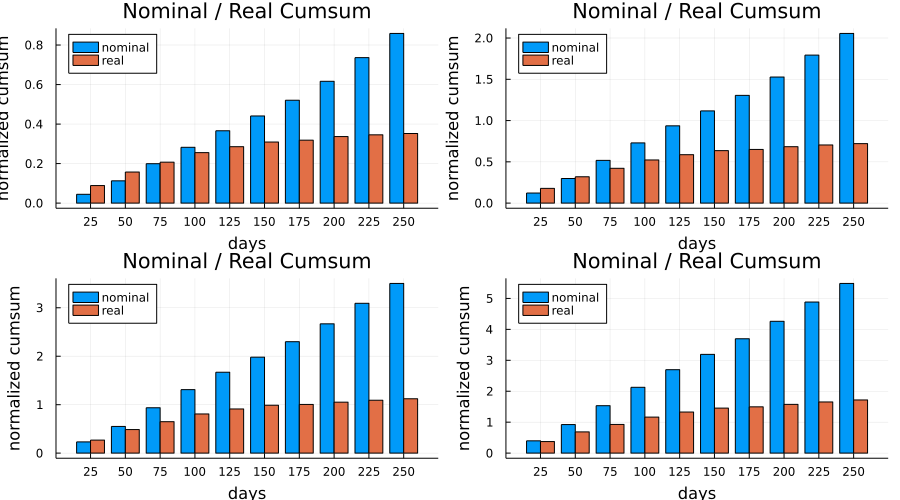

In [11]:
using StatsPlots

mycumsum1 = cumsum(tux[:, C] for C in 10:14) ./ 250;
mycumsum2 = cumsum(tuy[:, C] for C in 10:14) ./ 250;

mycumsum1 = fix_array_expression(mycumsum1)
mycumsum2 = fix_array_expression(mycumsum2)

p = [mycumsum1[:, C] for C in 1:5]; p = cumsum.(p)
q = [mycumsum2[:, C] for C in 1:5]; q = cumsum.(q)

p = [groupedbar([p[R] q[R]], labels = ["nominal" "real"]) for R in 1:5];

ticklabel = string.([I for I in 25:25:250])

gr()

plot!(p[1], p[2], p[3], p[4], bar_position = :dodge,
                              title = "Nominal / Real Cumsum",
                              layout = (2, 2), legend = :topleft, size = (900, 500), xticks = (1:10, ticklabel))

plot!(xlab = "days", ylab = "normalized cumsum")

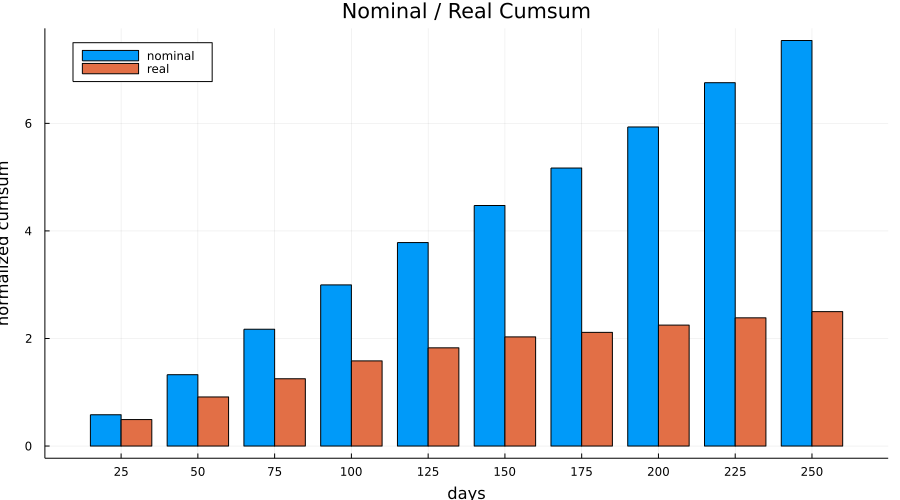

In [12]:
ticklabel = string.([I for I in 25:25:250])

gr()

plot(p[5], bar_position = :dodge,
           title = "Nominal / Real Cumsum",
           layout = (1, 1), legend = :topleft, size = (900, 500), xticks = (1:10, ticklabel))

plot!(xlab = "days", ylab = "normalized cumsum")

where issuances in <span style="color:blue">blue</span> are nominal rates and issuances in <span style="color:red">red</span> are real rates.

### Plotting Nominal CMT Yield Curve Rates for UpTo One (1) Year and then $Y \in [5,\ 7,\ 10,\ 20,\ 30]$ Years

In [13]:
mmx = range(25, 250, step = 25)
# string.(tux[:, 2][m] for m in mmx)

25:25:250

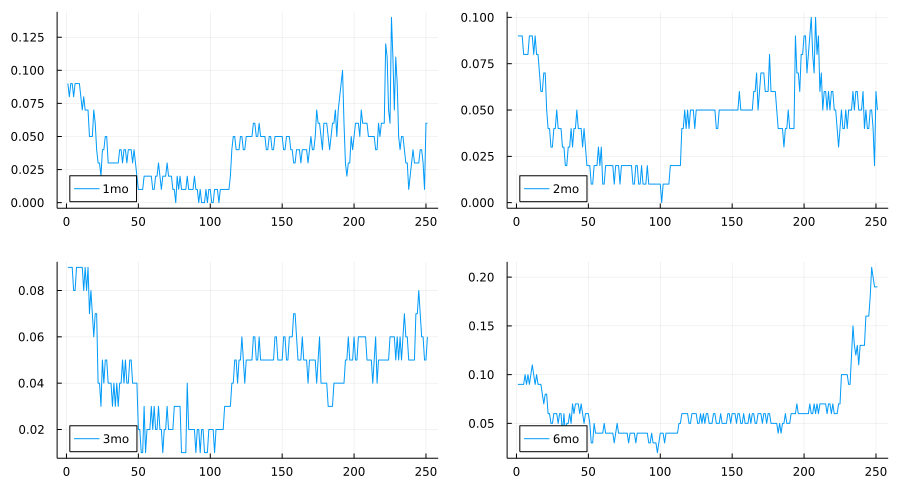

GKS: String is too long in routine TEXT
GKS: String is too long in routine TEXT
GKS: String is too long in routine TEXT
GKS: String is too long in routine TEXT


In [14]:
ticklabel = string.(tux[:, 2])

lb = ["1mo", "2mo", "3mo", "6mo", "1yr"]
p = [plot(tux[:, C], 
    label = lb[C-2], layout = (1, 1), xlab = [string.(tux[:, 2][m] for m in mmx)], legend = :bottomleft, size = (900, 500)) for C in 3:7];
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

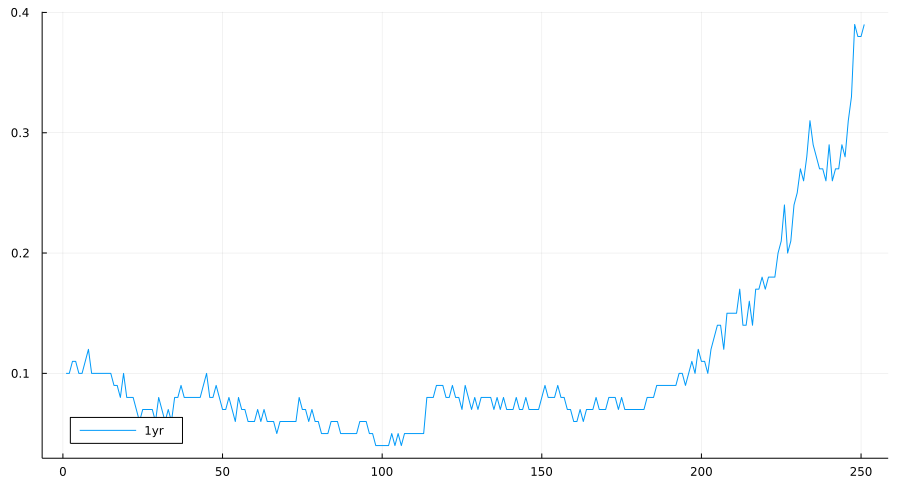

GKS: String is too long in routine TEXT


In [15]:
plot(p[5])

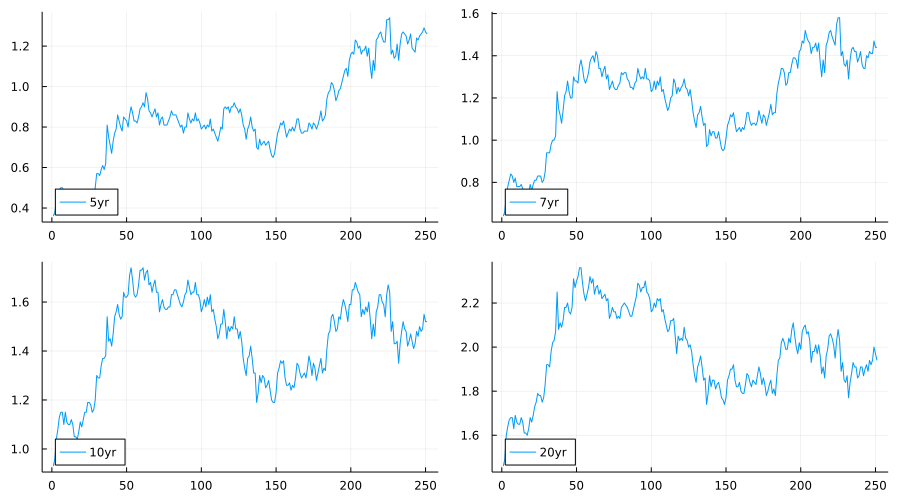

In [16]:
lb = ["5yr", "7yr", "10yr", "20yr", "30yr"]
p = [plot(tux[:, C],
    label = lb[C-9],
    layout = (1, 1), legend = :bottomleft, size = (900, 500)) for C in 10:14];
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

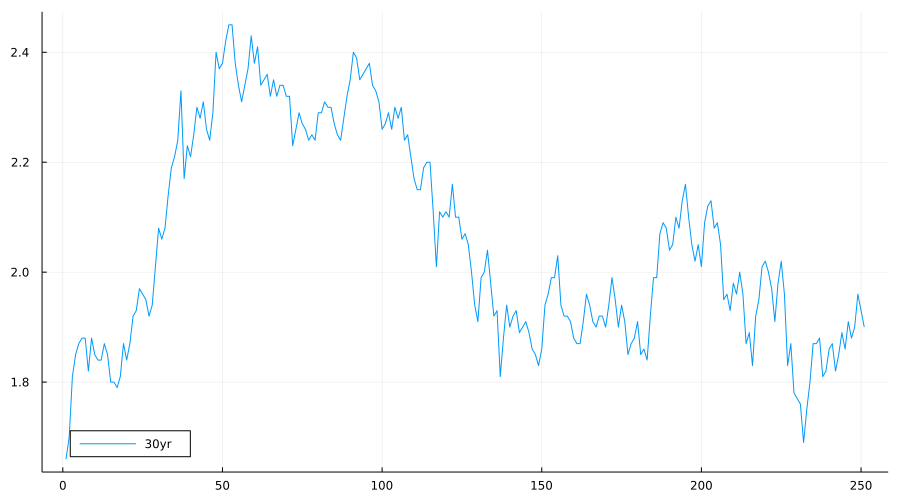

In [17]:
plot(p[5])

There seems to be some **autocorrelation** in the data, with a wide variance in interest rates for all notes, except that the `6` month bill and `1` year note have an exponential curve.

### Plotting Real Interest Rates

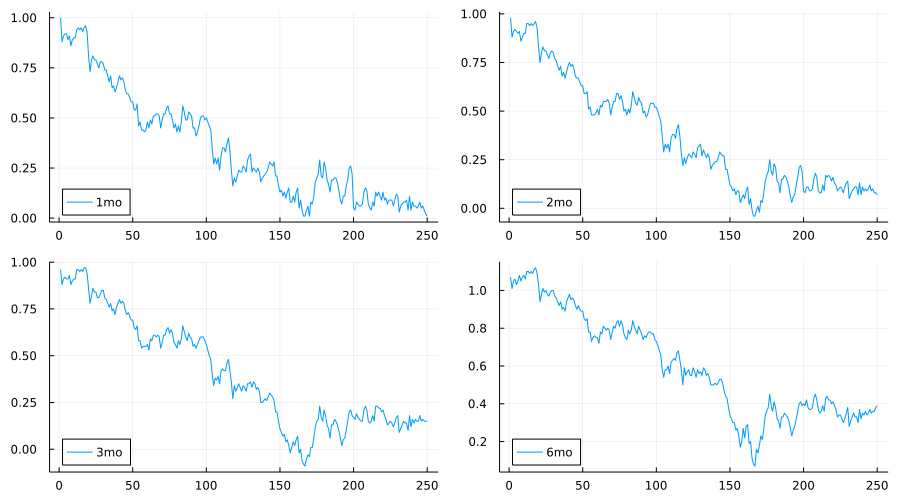

In [18]:
lb = ["1mo", "2mo", "3mo", "6mo", "1yr"]
p = [plot(tuy[:, C], 
    label = lb[C-9], 
    layout = (1, 1), legend = :bottomleft, size = (900, 500)) for C in 10:14]
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

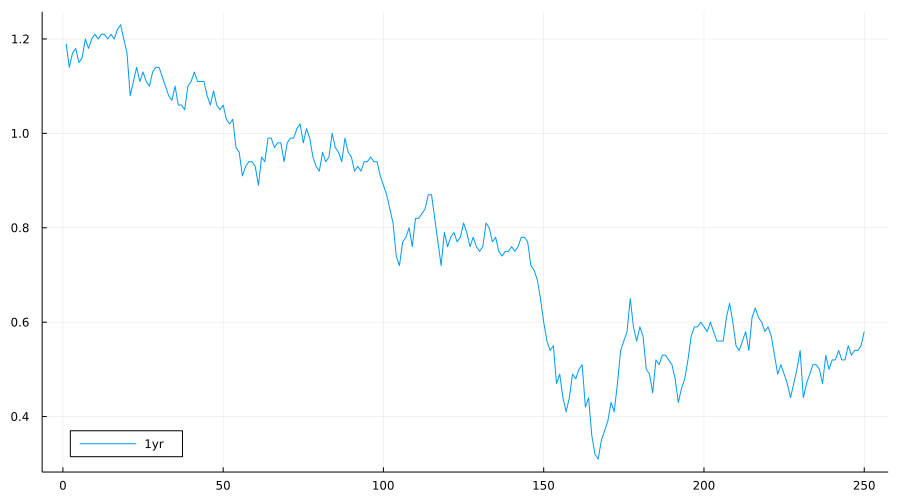

In [19]:
plot(p[5])

The raw (non-transformed) data exhibit similar trends for all maturities, with the yield decreasing towards the end of the year.

### Plotting Nominal$-$Real Yield Curve Rates for 5, 7, 10, 20, and 30 Year CMTs to Determine Inflation Rates.

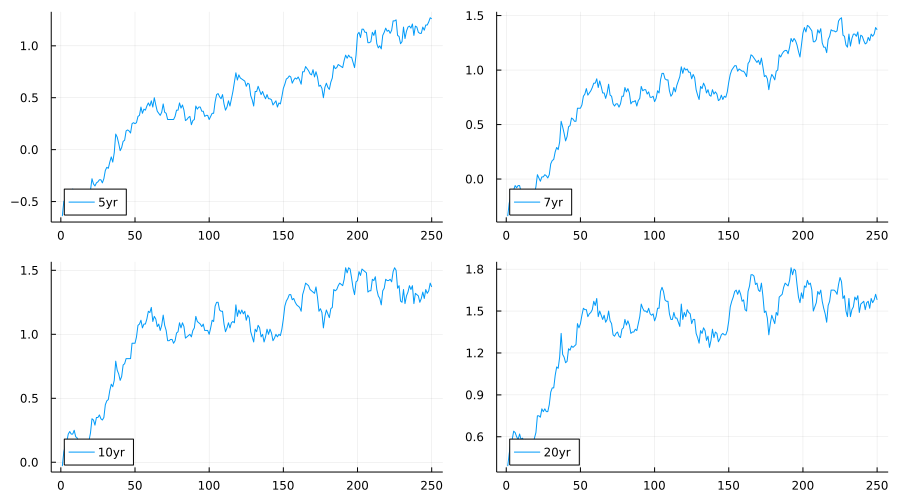

In [20]:
mtux = Matrix(tux)
mtuy = Matrix(tuy)

N = min(size(mtux)[1], size(mtuy)[1])
mtnf = mtux[1:N, 10:14] .- mtuy[1:N, 10:14]
lb = ["5yr", "7yr", "10yr", "20yr", "30yr"]
p = [plot(mtnf[1:N, C], 
    label = lb[C], 
    layout = (1, 1), legend = :bottomleft, size = (900, 500)) for C in 1:5]
plot(p[1], p[2], p[3], p[4], layout = (2, 2))

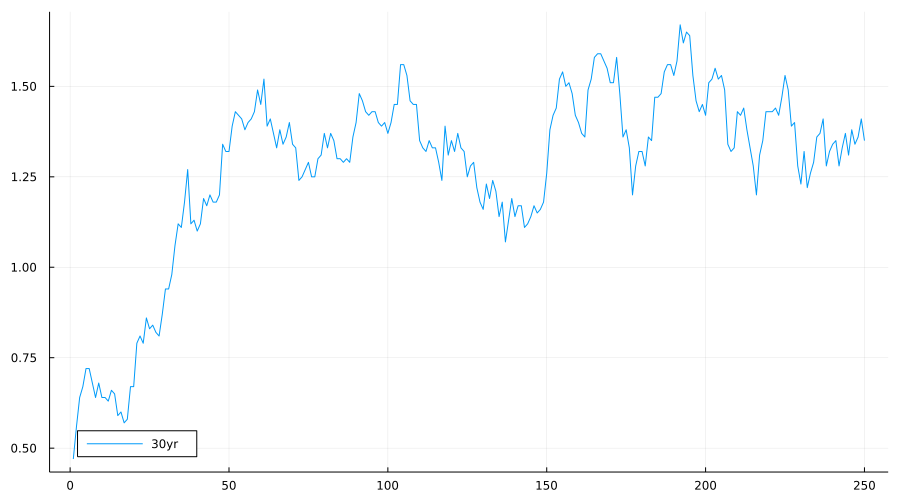

In [21]:
plot(p[5])

### Saving `tnf` for Using in Other Notebooks

In [22]:
using CSV

CSV.write("tnf.csv", (x5 = mtnf[:, 1], x7 = mtnf[:, 2], x10 = mtnf[:, 3], x20 = mtnf[:, 4], x30 = mtnf[:, 5]));

## Inflation Rates for 2021

Reading `CSV` with inflation rates for US Treasury yield curve rates in $2021$,

In [23]:
tnf = CSV.read("tnf.csv", DataFrame)

,x5,x7,x10,x20,x30
,Float64,Float64,Float64,Float64,Float64
1,-0.64,-0.34,-0.03,0.39,0.47
2,-0.5,-0.22,0.08,0.48,0.56
3,-0.48,-0.17,0.13,0.55,0.64
4,-0.46,-0.14,0.16,0.58,0.67
5,-0.43,-0.1,0.22,0.64,0.72
6,-0.39,-0.06,0.24,0.63,0.72
7,-0.41,-0.08,0.22,0.6,0.68
8,-0.38,-0.06,0.22,0.58,0.64
9,-0.4,-0.06,0.25,0.62,0.68


Plotting inflation rate for $5$yr and $7$yr note CMTs, as well as $10$yr, $20$yr and $30$yr bond CMTs, destinguishing between training and test datasets (currently the `s_test` dataset is empty, although I will try some cross validation, sampling across thirty years of historical yield curve rate data, in `Treas TS Analysis II`.

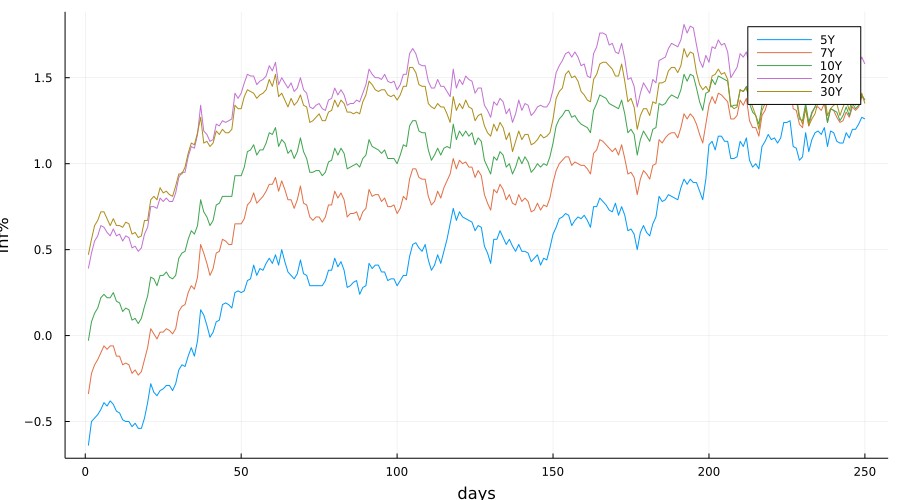

In [24]:
include("helpers.jl"); using Plots

s = tnf
lb = ["5Y", "7Y", "10Y", "20Y", "30Y"]; s_train, s_test, p = h1(s, lb, 1); p

There seems to be some correlation across maturities. I now draw `QQNorm` plots to visually understand the distribution of inflation rates (even though I know it is wrong to assume normal distribution). Correlation across maturities will be analyzed more in-depth in `Treas TS Analysis II`.

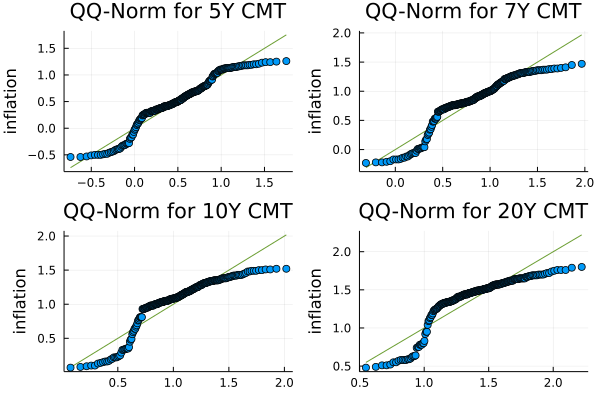

In [25]:
using Distributions

μ = [mean(tnf[:, i]) for i in 1:size(tnf)[2]]
σ = [std(tnf[:, i]) for i in 1:size(tnf)[2]]

t = ["QQ-Norm for 5Y CMT", "QQ-Norm for 7Y CMT", "QQ-Norm for 10Y CMT", "QQ-Norm for 20Y CMT", "QQ-Norm for 30Y CMT"]
p = [qqplot(Normal(μ[C], σ[C]), tnf[:, C], title = t[C], ylabel = "inflation") for C in 1:5]
gr(); plot(p[1], p[2], p[3], p[4], layout = (2, 2))

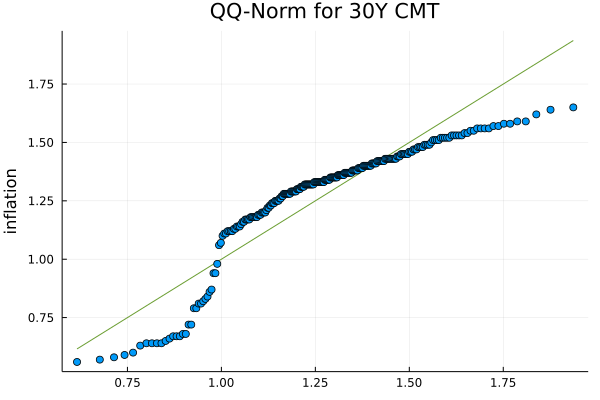

In [26]:
gr(); plot(p[5])

These are all of them taken together.

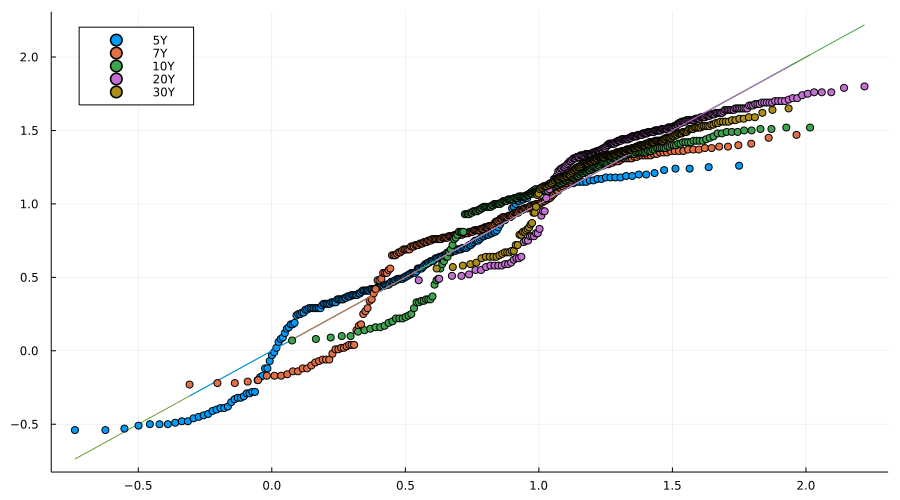

In [27]:
lb = ["5Y", "7Y", "10Y", "20Y", "30Y"]
h2(s_train, 1, 5, lb)

The distribution $\forall$ inflation rates is not normal; more information is needed before making any conclusion, especially when the `mean` and `std` functions take a standard normal parametric assumption. In my naivete, I thought this approach would be right, but I discovered later that it is not, although `QQNorm` allows visualization of "fat tails".

### Annual Inflation Distribution (PDF and CDF) for $2021$

With the data I have for $2021$, I can obtain something close to a probability distribution function ($\text{PDF}$) to have more information about the data dispersion. I say it is "something close" to a $\text{PDF}$ because there must be sufficient observations in order to have a proper distribution. How much is sufficient? The central limit theorem ($\text{CLT}$) says that quite often, when a random variable is independent and adequately normalized, the frequencies tend towards a normal distribution, even if the original variables are not normally distributed.

In statistics, a $Z$-score is often taken, where

$$
    Z \leq \frac{|x - \bar{X}|}{s_x}
$$

Then I have that

$$
    \bar{X} - s_xZ \leq x \leq \bar{X} + s_xZ
$$

Econometricians like to talk about probabilities. How about the probability that $Z \leq |x|$ or $P(Z \leq |x|) = -x \leq P(Z \leq |x|) \leq x$? After normalizing data points into standard $Z$-scores, these probabilities would help an econometrician determine the value-at-risk (VaR).

**Law of Large Numbers**

The law of large numbers (LLN) is a result from mathematics about many distributions. It states that these distributions tend towards Gaussian normal as the number of observations tend to infinity.

**Probability Distribution Function**

Time series are different from traditional distribiutions, because they are different data types. Distributions are nominal and time series data is ordinal (there are chronological dates running along the **abscissa** and marginal rates running along the **ordinate**). However, it is still useful to have an annual distribution of the data.

**Algorithm (Pseudo Code) for Annual Distribution**

1. sort X
2. find range of X
3. decide on the number of bins (K)
4. bin_width = $\lceil{range / K\rceil}$
5. $[S_0, S_1), [S_1, S_2), \cdots, [S_{n-1}, S_n]$
6. count observations falling in each bin
7. construct table $[\text{smallest}, \cdots, \text{largest}]$

With the pseudo-code above, I can bin the observations for each maturing security of fiscal year $2021$, first sorting the observations.

In [28]:
X = sort(tuy[:, 10]);

Then, I approximate the range of a continuous random variable (recalling that the sum of indefinitely small quantities is indefinite for a continuous random variable).

In [29]:
rng = X[end] - X[1]

0.99

Earlier I had chosen $25$ bins. Therefore,

In [30]:
K = 25

25

Then, putting it all together, to count the total frequency for each bin and return a custom-made "histogram" for, say, the $5\text{Y}$ T-note, I obtain

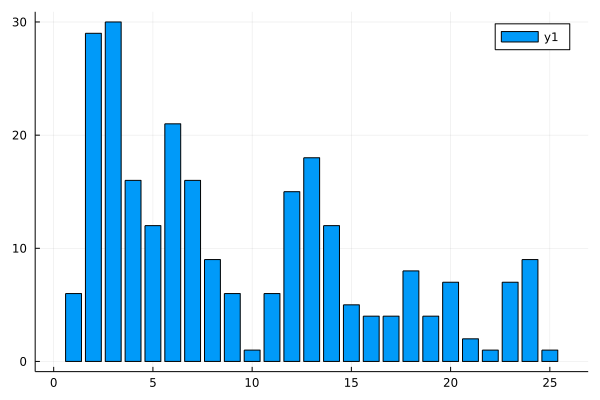

In [31]:
K = 25

X = sort(tuy[:, 10])
rng = X[end] - X[1]

bin_width = rng / K
T = 0; freqs = zeros(K)

k = 1
while k <= K
    
    for x in X
        if x >= T && x < T + bin_width
            freqs[k] = freqs[k] + 1
        end
    end
    
    T = T + bin_width
    k = k + 1
end

bar(freqs)

Note I could have done the same using the `histogram` function in Julia.

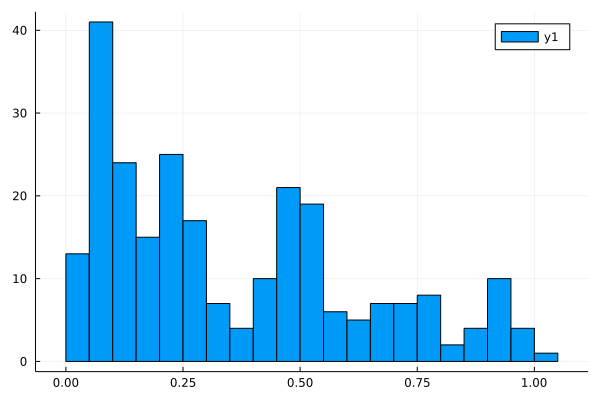

In [32]:
histogram(X, bins = 25)

Here are all five maturities taken together.

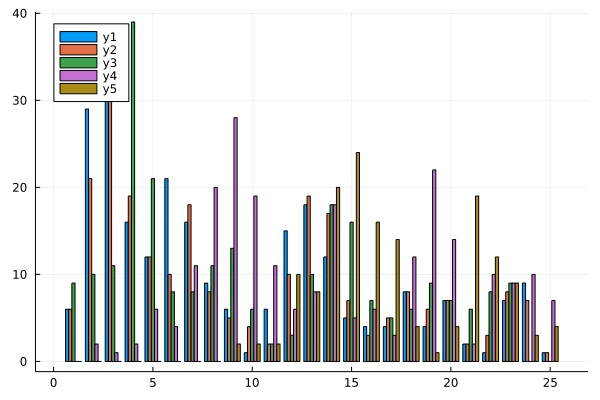

In [33]:
K = 25
freq = zeros(K, 5)

for I in 1:5
    X = sort(tuy[:, I+9])
    rng = X[end] - X[1]

    bin_width = rng / K
    T = 0

    k = 1
    while k <= K

        for x in X
            if x >= T && x < T + bin_width
                freq[k, I] = freq[k, I] + 1
            end
        end

        T = T + bin_width
        k = k + 1
    end
end

groupedbar(freq, bar_position = :dodge, orientation = :vertical, legend = :topleft)

**Cummulative Distribution Function**

Similarly, a cumulative distribution would look as follows (something like this was tried earlier for **nominal** and **real** $\text{CMT}$ rates).

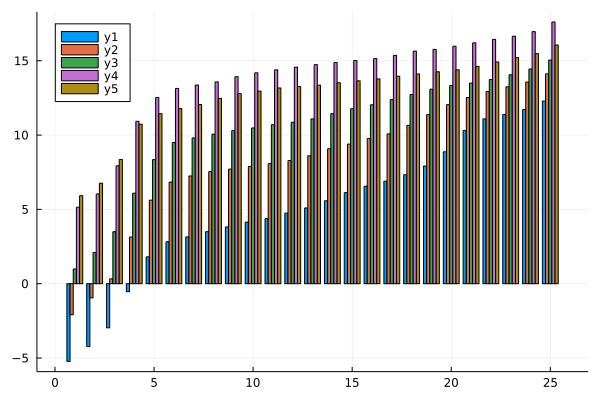

In [34]:
K = 25
freq = zeros(K, size(tnf)[2])

for I in 1:size(freq)[2]
    X = sort(tnf[:, I])

    D = 1
    rng = size(X)[1]
    bin_width = Int(ceil(rng / K))

    for k in 1:K
        Y = X[D:D+bin_width-1]
        for y in Y
            freq[k, I] = freq[k, I] + y
        end
        D = D + bin_width
    end
end
    
groupedbar(freq, bar_position = :dodge, orientation = :vertical, legend = :topleft)

### Boxplot for Inflation Rates

A boxplot would be good for finding outliers in the average yield curve rates and also to capture basic measures of dispersion, such as the median, **$\text{IQR}$** and the range.

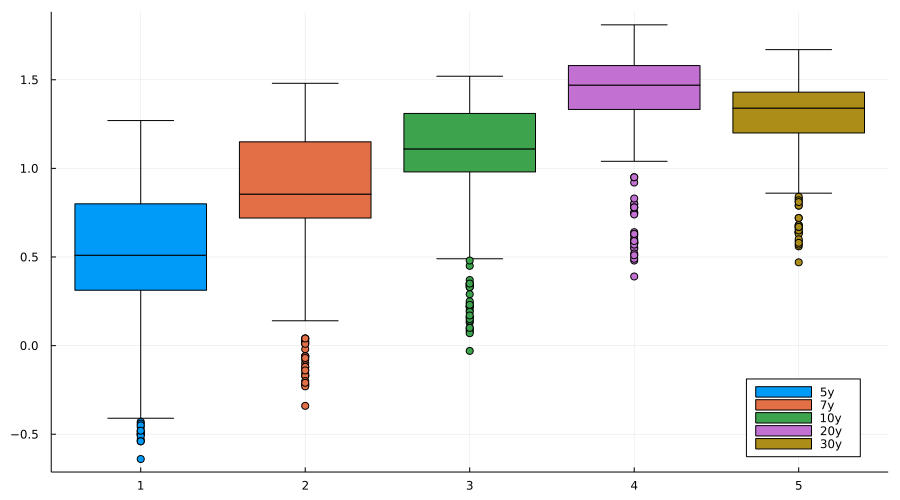

In [35]:
lb = ["5y", "7y", "10y", "20y", "30y"]
function h3(M, A, B)
    b = boxplot(M[:, A], label = lb[1], layout = (1, 1), legend = :bottomright, size = (900, 500))
    for C in A+1:B
        boxplot!(M[:, C], label = lb[C])
    end
    return b
end
h3(tnf, 1, 5)

Having found outlier beneath the **lower limit** of all the yield maturities, it is unwise to proceed with periodically taking mean, median, standard deviation ($\sqrt{Var(X)}$), skewness and excess kurtosis, without properly dealing with the outliers.

### Winsorized Mean

Typically, one would take a winsorized mean with $y = 5\%$

where

$L_y = (n + 1) \times (y\ /\ 100)$

interpolating the values, using the linear interpolation formula:

$P_y = \lfloor X \rfloor + (L_y - \lfloor L_y \rfloor) \times (\lceil X \rceil - \lfloor X \rfloor)$

which produces

In [36]:
a = 0.025
l = 250a; u = 250(1 - a)

l = (size(tnf)[1] + 1)a
u = (size(tnf)[1] + 1) * (1 - a)

(l, u)

(6.275, 244.725)

In [37]:
Pl = [tnf[Int(floor(l)), c] + (l - Int(floor(l))) * (tnf[Int(ceil(l)), c] - tnf[Int(floor(l)), c]) for c in 1:5]
Pu = [tnf[Int(floor(u)), c] + (u - Int(floor(u))) * (tnf[Int(ceil(u)), c] - tnf[Int(floor(u)), c]) for c in 1:5]

b = DataFrame(x05 = Pu[1] .> tnf[:, 1] .> Pl[1], x07 = Pu[2] .> tnf[:, 2] .> Pl[2], x10 = Pu[3] .> tnf[:, 3] .> Pl[3], x20 = Pu[4] .> tnf[:, 4] .> Pl[4], x30 = Pu[5] .> tnf[:, 5] .> Pl[5])

,x05,x07,x10,x20,x30
,Bool,Bool,Bool,Bool,Bool
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,1,1
6,1,1,1,1,1
7,0,0,0,0,0
8,1,1,0,0,0
9,0,1,1,0,0


In [38]:
M = 250; N = 5;

tvf = tnf;

for I in 1:M
    for J in 1:N
        if b[I, J] == 0
            if tvf[I, J] >= Pu[J]
                tvf[I, J] = Pu[J]
            else
                tvf[I, J] = Pl[J]
            end
        end
    end
end

In [39]:
tvf

,x5,x7,x10,x20,x30
,Float64,Float64,Float64,Float64,Float64
1,-0.3955,-0.0655,0.2345,0.62175,0.709
2,-0.3955,-0.0655,0.2345,0.62175,0.709
3,-0.3955,-0.0655,0.2345,0.62175,0.709
4,-0.3955,-0.0655,0.2345,0.62175,0.709
5,-0.3955,-0.0655,0.2345,0.64,0.72
6,-0.39,-0.06,0.24,0.63,0.72
7,-0.3955,-0.0655,0.2345,0.62175,0.709
8,-0.38,-0.06,0.2345,0.62175,0.709
9,-0.3955,-0.06,0.25,0.62175,0.709


### Lowest Positive Value?

However, given that some of these values would be negative (indicating deflation), I could try something else. Maybe it is better to reassign the negative values to the lowest positive value found in the sequence?

In [40]:
tvf = sort(Matrix(tnf), dims = 1)

function pos(x)
    n = -1; i = 0;
    while n < 0
        i = i + 1
        n = tvf[i, x]
    end
    return n
end

M = 250; N = 5
Q = [pos(1), pos(2), pos(3), pos(4), pos(5)]

for I in 1:M
    for J in 1:N
        if Q[J] > tnf[I, J]
            tnf[I, J] = Q[J]
        end
    end
end

tnf

,x5,x7,x10,x20,x30
,Float64,Float64,Float64,Float64,Float64
1,0.02,0.01,0.2345,0.62175,0.709
2,0.02,0.01,0.2345,0.62175,0.709
3,0.02,0.01,0.2345,0.62175,0.709
4,0.02,0.01,0.2345,0.62175,0.709
5,0.02,0.01,0.2345,0.64,0.72
6,0.02,0.01,0.24,0.63,0.72
7,0.02,0.01,0.2345,0.62175,0.709
8,0.02,0.01,0.2345,0.62175,0.709
9,0.02,0.01,0.25,0.62175,0.709


### Mean ($\mu$) of Inflation Rates

I will take two harmonic means. The first harmonic mean is the mean inflation for inflation rates along the year. The second harmonic mean is along each independent bond category. Taking $25$ intevals of $25$ days each, I find that

In [41]:
tf = []
for J in 1:5
    m = 1
    for I in 25:25:250
        append!(tf, mean(tnf[m:I, J]))
        m = I + 1
    end
end

tf = reshape(tf, 10, 5)
tf = DataFrame(x05 = tf[:, 1], x07 = tf[:, 2], x10 = tf[:, 3], x20 = tf[:, 4], x30 = tf[:, 5])

,x05,x07,x10,x20,x30
,Any,Any,Any,Any,Any
1,0.02,0.012,0.25484,0.65159,0.73128
2,0.0892,0.3608,0.6512,1.1212,1.09986
3,0.3704,0.7912,1.072,1.45725,1.31626
4,0.3472,0.7576,1.0336,1.42455,1.31256
5,0.5336,0.9012,1.1384,1.48305,1.31708
6,0.5132,0.8036,1.0176,1.338,1.1792
7,0.7012,1.032,1.2638,1.5282,1.3265
8,0.7776,1.11459,1.24975,1.50175,1.3172
9,1.10005,1.26547,1.29065,1.525,1.31866


In [42]:
t = mean(eachcol(tf))
t = hcat([i for i in 1:10], t)
t = DataFrame(month = t[:, 1] * (12 / 10), rate = t[:, 2])

,month,rate
,Float64,Float64
1,1.2,0.333942
2,2.4,0.664452
3,3.6,1.00142
4,4.8,0.975102
5,6.0,1.07467
6,7.2,0.97032
7,8.4,1.17034
8,9.6,1.19218
9,10.8,1.29997


┌ Warning: RCall.jl: -- Attaching packages --------------------------------------- tidyverse 1.3.1 --
│ v ggplot2 3.3.5     v purrr   0.3.4
│ v tibble  3.1.6     v dplyr   1.0.8
│ v tidyr   1.2.0     v stringr 1.4.0
│ v readr   2.1.2     v forcats 0.5.1
│ -- Conflicts ------------------------------------------ tidyverse_conflicts() --
│ x dplyr::filter() masks stats::filter()
│ x dplyr::lag()    masks stats::lag()
└ @ RCall C:\Users\Owner\.julia\packages\RCall\6kphM\src\io.jl:172


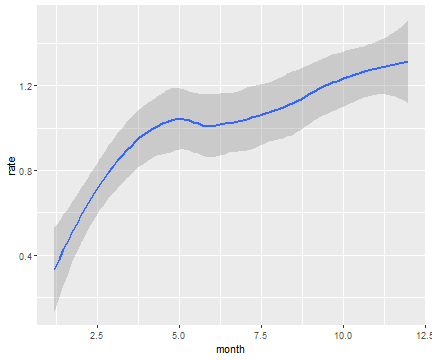

RObject{VecSxp}


┌ Warning: RCall.jl: `geom_smooth()` using method = 'loess' and formula 'y ~ x'
└ @ RCall C:\Users\Owner\.julia\packages\RCall\6kphM\src\io.jl:172


In [43]:
using RCall

@rput(t)

R"""
    library(tidyverse)
    
    ggplot(data = t, mapping = aes(x = month, y = rate)) + geom_smooth()
"""

which is the S-curve we often find in annual business cycles (evidently, there is more inflation towards the end of the year in the case of `2021`). However, when analysts talk about "yield curves", they usually imply the following pictorial representation, where the annual yield curve looks like

In [44]:
sz = size(tnf)[2]

t = [sz / sum(1 / tnf[:, I]) for I in 1:sz]
t = hcat([i for i in [5, 7, 10, 20, 30]], t)
t = DataFrame(maturity = t[:, 1], rate = t[:, 2])

,maturity,rate
,Float64,Float64
1,5.0,3.99505
2,7.0,5.04834
3,10.0,5.64002
4,20.0,7.05171
5,30.0,6.25709


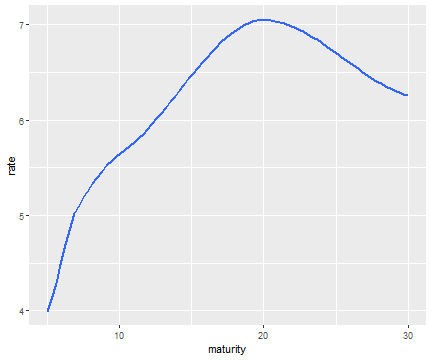

RObject{VecSxp}


┌ Warning: RCall.jl: `geom_smooth()` using method = 'loess' and formula 'y ~ x'
│ Warning in simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
│   span too small.   fewer data values than degrees of freedom.
│ Warning in simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
│   pseudoinverse used at 4.875
│ Warning in simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
│   neighborhood radius 5.125
│ Warning in simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
│   reciprocal condition number  0
│ Warning in simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
│   There are other near singularities as well. 405.02
│ Warning in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)),  :
│   span too small.   fewer data values than degrees of freedom.
│ Warning in predLoess(object$y, object$x,

In [45]:
using RCall

@rput(t)

R"""
    library(tidyverse)
    
    ggplot(data = t, mapping = aes(x = maturity, y = rate)) + geom_smooth()
"""

See the yield curve inversion at the 30 year bond?

### Median of Inflation Rates

$$
    \mu = \frac{1}{n} \sum_{i = 1}^{n}{x_i}
$$

Taking $20$ intevals of $13$ days each, I find that

In [46]:
tf = []
for J in 1:5
    m = 1
    for I in 20:19:250
        append!(tf, median(tnf[m:I, J]))
        m = I
    end
end

tf = reshape(tf, 13, 5)
tf = DataFrame(x05 = tf[:, 1], x07 = tf[:, 2], x10 = tf[:, 3], x20 = tf[:, 4], x30 = tf[:, 5])

,x05,x07,x10,x20,x30
,Any,Any,Any,Any,Any
1,0.02,0.01,0.2345,0.62175,0.709
2,0.02,0.09,0.41,0.875,0.905
3,0.25,0.65,0.93,1.395,1.32
4,0.36,0.79,1.07,1.44,1.3265
5,0.375,0.77,1.05,1.405,1.3265
6,0.415,0.805,1.085,1.485,1.3265
7,0.62,0.925,1.105,1.43,1.285
8,0.5,0.785,1.0,1.335,1.17
9,0.705,1.045,1.29375,1.53375,1.3265


### Standard Deviation of Inflation Rates

$
    \text{Let} \\
    \quad\quad s = \sqrt{\frac{1}{n - 1} \sum_{i = 1}^n (x_i - \bar{x})^2}
$

Taking $20$ intervals of $13$ days each, I find that

In [47]:
tf = []
for J in 1:5
    m = 1
    for I in 20:19:250
        append!(tf, std(tnf[m:I, J]))
        m = I
    end
end

tf = reshape(tf, 13, 5)
tf = DataFrame(Y05 = tf[:, 1], Y07 = tf[:, 2], Y10 = tf[:, 3], Y20 = tf[:, 4], Y30 = tf[:, 5])

,Y05,Y07,Y10,Y20,Y30
,Any,Any,Any,Any,Any
1,0.0,0.0,0.00361612,0.00463856,0.00338573
2,0.0361685,0.172612,0.162027,0.194736,0.160699
3,0.130263,0.155241,0.159416,0.140135,0.0861311
4,0.0670644,0.0842599,0.0882147,0.0782606,0.033403
5,0.0597715,0.0559582,0.0517992,0.0696163,0.0203894
6,0.0820318,0.0791983,0.0793659,0.0380661,0.00145344
7,0.0849938,0.0855493,0.0766812,0.0706984,0.0561441
8,0.0791717,0.0875094,0.0995715,0.0846433,0.0729258
9,0.0461662,0.0564195,0.0348436,0.00899653,2.27813e-16


### Skewness and Excess Kurtosis $(K_E)$ of Inflation Rates

$$
    \text{skewness} = \frac{1}{n}\sum_{i = 1}^n \frac{x_i - \bar{x})^3}{s^3}
$$

Taking $20$ intervals of $13$ days each, I find that

In [48]:
tf = []
for J in 1:5
    m = 1
    for I in 20:19:250
        append!(tf, skewness(tnf[m:I, J]))
        m = I
    end
end

tf = reshape(tf, 13, 5)
tf = DataFrame(Y05 = tf[:, 1], Y07 = tf[:, 2], Y10 = tf[:, 3], Y20 = tf[:, 4], Y30 = tf[:, 5])

,Y05,Y07,Y10,Y20,Y30
,Any,Any,Any,Any,Any
1,NaN,NaN,3.5224,2.68661,2.66667
2,2.51672,0.800326,0.524855,0.495628,0.434811
3,-0.159332,-0.175705,-0.133237,-0.202202,-0.44574
4,0.256072,-0.0269077,-0.0572981,-0.259745,-1.08326
5,-0.308545,-0.148538,-0.0563201,0.219196,-1.60092
6,0.0796602,0.461888,0.633026,-0.179015,-4.12948
7,-0.481157,-0.446476,-0.367966,-0.275968,-0.448276
8,0.779782,1.24712,1.43727,1.15601,0.929159
9,0.0200284,-0.0435858,-1.44903,-2.8255,1.0


and

$$
    K_E = \frac{1}{n}\sum_{i = 1}^n (x_i - \bar{x})^4 / s^4 - 3
$$

In [49]:
tf = []
for J in 1:5
    m = 1
    for I in 20:19:250
        append!(tf, kurtosis(tnf[m:I, J]))
        m = I
    end
end

tf = reshape(tf, 13, 5)
tf = DataFrame(Y05 = tf[:, 1], Y07 = tf[:, 2], Y10 = tf[:, 3], Y20 = tf[:, 4], Y30 = tf[:, 5])

,Y05,Y07,Y10,Y20,Y30
,Any,Any,Any,Any,Any
1,NaN,NaN,11.2603,6.346,5.11111
2,4.81027,-0.663647,-0.979476,-0.868903,-1.07744
3,-1.16363,-1.21409,-1.35263,-1.5394,-1.47379
4,-1.12993,-1.34246,-1.23972,-1.28908,-0.648279
5,-1.08331,-1.30471,-0.977853,-1.28048,2.3612
6,-1.41138,-1.01543,-0.913586,-1.50277,15.0526
7,-0.527349,-0.734567,-0.628594,-0.738084,-1.15669
8,-0.22559,0.44478,0.791461,0.329812,-0.0188657
9,-0.776073,-0.996903,0.792204,6.30147,-2.0


## Distribution Determination (Density Testing and PDF Kernel Selection)

To determine what the density of the the data between columns `10:14` (representing rates for the 5, 7, 10, 20 and 30 Year Treasury securities) is going to be, I will run a series of tests to determine an adequate probability density function (PDF).

### Nominal ADF Test for Stationarity (Augmented Dickey-Fuller Test)

The nominal CMT yield curve rates are usually not adjusted for inflation. The aim is to determine **inflation**. Stabilized inflation rates are unlikely to take place in a **Market Economy**, where there are real laws of supply and demand, and equilibrium doesn't just happen through an "invisible hand" unless the pricing mechanics are in place to allow cooperation without coercion (F. von Hyek; Milton Friedman).

It is well worthwhile to determine any stationarity in the stochastic process, corresponding to each CMT yield curve rate series and remove nonstationarity for the purposes of making better forecasts.

In [50]:
using HypothesisTests

[ADFTest(tux[:, I], Symbol("constant"), 5) for I in 10:14]

5-element Array{ADFTest,1}:
 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0102952

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.7812

Details:
    sample size in regression:          245
    number of lags:                     5
    ADF statistic:                      -0.920298
    Critical values at 1%, 5%, and 10%: [-3.45667 -2.87312 -2.57294]

 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0242851

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.3960

Details:
    sample size in regression:          

In the ADF test for nominal interest rates **I fail to reject $H_0$** (that the stochastic process is stationary) **with confidence levels between 54.22% and 61.38%**. I will produce a comparable test for the real interest rates of fiscal year 2019.

### Real ADF Test for Stationarity (Augmented Dickey-Fuller Test)

The real yield curve rates are always adjusted for inflation in market rates. I then have

In [51]:
[ADFTest(tuy[:, I], Symbol("constant"), 5) for I in 10:14]

5-element Array{ADFTest,1}:
 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0163393

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4155

Details:
    sample size in regression:          244
    number of lags:                     5
    ADF statistic:                      -1.73037
    Critical values at 1%, 5%, and 10%: [-3.45678 -2.87317 -2.57297]

 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0140648

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4187

Details:
    sample size in regression:          2

In the case of real yield curve rates, **I reject the $H_0$ hypothesis with confidence levels between 41.55% and 57.05%**. Since there is rejection for both real and nominal, I will require a **first order differencing transformation** for these two types of rates, due to nonstationarity. I need to take the transformation for inflation rates, since the aim of my study is to determine the financial leverage of securities, on the average.

In [52]:
X = diff(Matrix(tnf), dims = 1)

249×5 Array{Float64,2}:
  0.0       0.0       0.0       0.0       0.0
  0.0       0.0       0.0       0.0       0.0
  0.0       0.0       0.0       0.0       0.0
  0.0       0.0       0.0       0.01825   0.011
  0.0       0.0       0.0055   -0.01     -2.22045e-16
  0.0       0.0      -0.0055   -0.00825  -0.011
  0.0       0.0       0.0       0.0       0.0
  0.0       0.0       0.0155    0.0       0.0
  0.0       0.0      -0.0155    0.0       0.0
  0.0       0.0       0.0       0.0       0.0
  0.0       0.0       0.0       0.0       0.0
  0.0       0.0       0.0       0.0       0.0
  0.0       0.0       0.0       0.0       0.0
  ⋮                                      
  0.05825   0.03825   0.05375   0.04375   0.04
  0.0       0.0       0.0       0.0       0.0065
 -0.02825  -0.00825   0.0       0.0       0.0
 -0.01     -0.03     -0.04375  -0.02375  -0.0465
  0.0       0.01      0.03      0.02375   0.0465
  0.03825   0.02825   0.01375   0.0       0.0
 -0.00825  -0.00825  -0.01375  -0.0137

### Running ADF Test Again to Determine Stationarity

In [53]:
[ADFTest(X[:, C], Symbol("constant"), 5) for C in 1:5]

5-element Array{ADFTest,1}:
 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.30997

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-10

Details:
    sample size in regression:          243
    number of lags:                     5
    ADF statistic:                      -7.43034
    Critical values at 1%, 5%, and 10%: [-3.45689 -2.87322 -2.57299]

 Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.08283

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-8

Details:
    sample size in regression:          243
    number of lags

With p-values sufficiently small, **all ADF tests pass, with 95% confidence**.

### Test for Normality (Jarque-Bera Test)

I want to determine if the transformed dataset has a normal distribution. The Jarque-Bera Lagrange Multiplier Test attempts to determine the normality of the dataset, by testing higher order moments, such as **skewness** and **kurtosis**.

In [54]:
[JarqueBeraTest(X[:, C]) for C in 1:5]

5-element Array{JarqueBeraTest,1}:
 Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.5344959124689166 and 4.155998634079692"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-5

Details:
    number of observations:         249
    JB statistic:                   25.7204

 Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "0.5316595784169187 and 4.120851529989164"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-5

Details:
    number of observations:         249
    JB statistic:                   24.7647

 Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   s

The J-B Normality Test **does not pass within the confidence region for any constant maturity Treasury coupon security**.

## Conclusions

No top-down probability density function (PDF) was determined, due to the volatility of the time series plots. A data-driven modeling approach is needed to come up with better forecasts.

There were some price anomalies detected for Treasury securities, as per the boxplots. Further analysis will be needed to come up with a better and more precise time series model, although this would suffice, given that I am only conducting an exploratory analysis. A good question to ask is, "Would a lag of $5$ be sufficient? Is it necessary or do I need to try with a lower lag?"

The inflation rates for fiscal year $2021$ indicate that there is inflation in the US securities market (more than in 2019, if I were to make a back-to-back comparison). In the following notebook, titled: `Treas TS Analysis`, I will be investigating ARIMA models for $T \in [5, 7, 10, 20, 30]$, as I go into a more **data-driven** modeling approach.